In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost keras


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.3 MB 730.2 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.3 MB 730.2 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.3 MB 730.2 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.3 MB 532.8 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.3 MB 532.8 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.3 MB 532.8 kB/s eta 0:00:02
   ---------------------------------------- 1.3/1.3 MB 677.9 kB/s eta 0:00:00
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Suc

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc


In [4]:
# Step 1: Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', 
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                        "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])


In [8]:
# Step 2: Handle zero values in important features
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\Hp\AppData\Local\Temp\ipykernel_9264\1927222408.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [10]:
# Step 3: EDA (Optional: for visuals)
 sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
 plt.show()


IndentationError: unexpected indent (1220129503.py, line 2)

In [12]:
# Step 4: Split features and labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [14]:
# Step 5: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
# Step 7: Train models
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)


In [20]:
# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


In [22]:
# Neural Network
nn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
# Step 8: Evaluate all models
models = {'Gradient Boosting': gb_pred, 'SVM': svm_pred, 'Neural Net': nn_pred}
for name, pred in models.items():
    print(f"--- {name} ---")
    print("F1 Score:", f1_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))


--- Gradient Boosting ---
F1 Score: 0.672566371681416
Confusion Matrix:
 [[79 20]
 [17 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

--- SVM ---
F1 Score: 0.6213592233009708
Confusion Matrix:
 [[83 16]
 [23 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

--- Neural Net ---
F1 Score: 0.6181818181818182
Confusion Matrix:
 [[78 21]
 [21 34]]
Classification Report:
               pre

In [26]:
# Step 9: AUC-ROC Curves
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

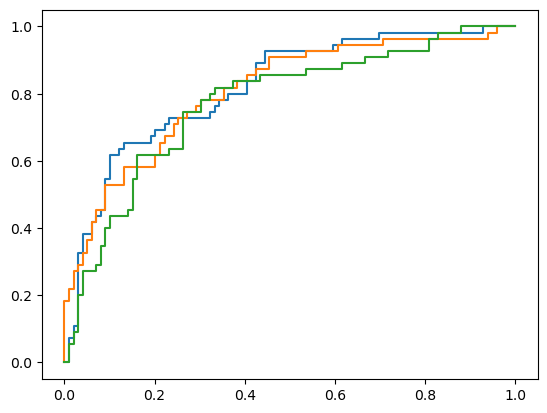

In [28]:
# Gradient Boosting ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(auc(fpr_gb, tpr_gb)))

# SVM ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(auc(fpr_svm, tpr_svm)))

# Neural Net ROC
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn.predict_proba(X_test)[:, 1])
plt.plot(fpr_nn, tpr_nn, label='Neural Network (AUC = {:.2f})'.format(auc(fpr_nn, tpr_nn)))


C:\Users\Hp\AppData\Local\Temp\ipykernel_9264\3011208854.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


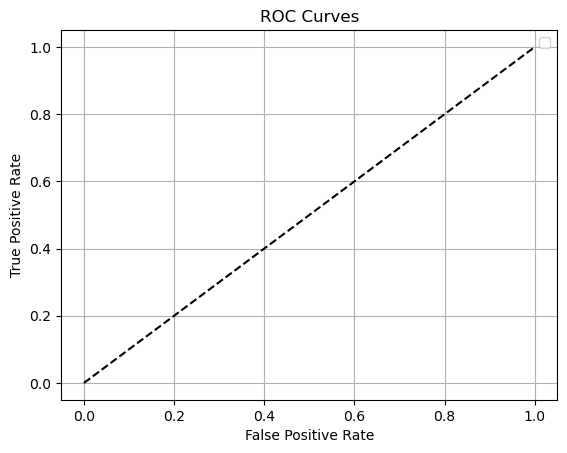

In [30]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


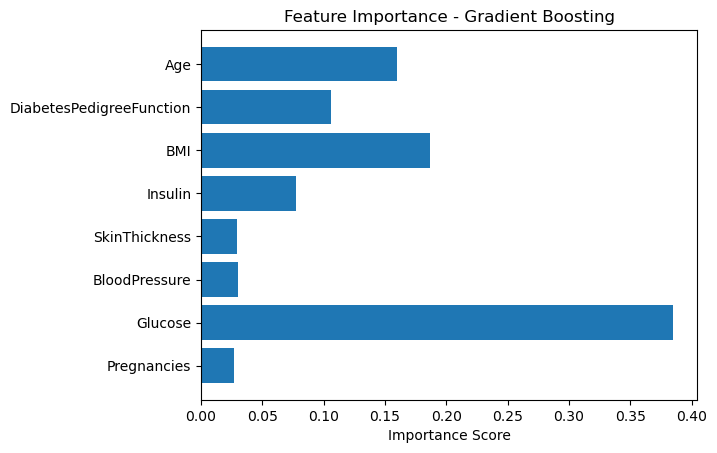

In [32]:
# Step 10: Feature Importance (Gradient Boosting)
importance = gb.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importance)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.show()
